   store_id    customer_id  product_id product_category             date  \
0  Store 01  Customer 1508       53642             Toys    4/1/2007 8:09   
1  Store 15   Customer 169       90945           Movies  2/15/2005 10:47   
2  Store 12   Customer 124       18548           Movies   9/27/2007 5:38   
3  Store 05  Customer 1988       85359            Books   5/7/2005 13:19   
4  Store 01   Customer 475       80069         Clothing   1/6/2008 17:36   

   amount  single_price  transaction_id  
0       3     90.246230               1  
1       2     60.586312               2  
2       5     96.612695               3  
3       5     16.962671               4  
4       5     65.215310               5  


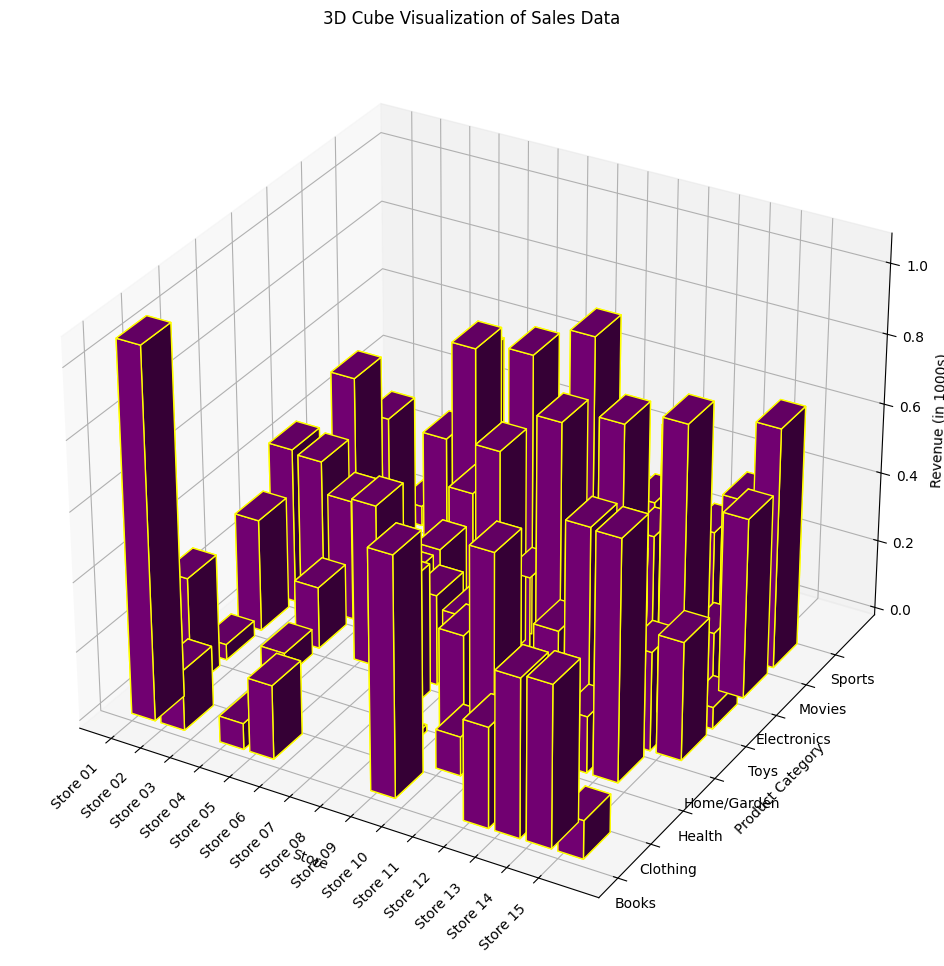

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Load sales data
data=pd.read_csv(r"C:\Users\Adeel\Downloads\sales_data.csv")
print(data.head())

data['revenue'] = data['amount'] * data['single_price']  # to check  transaction and sales performance 
aggregated_data = data.groupby(['store_id', 'product_category']).revenue.sum().reset_index() 


store_mapping = {store: i for i, store in enumerate(aggregated_data['store_id'].unique())}
category_mapping = {category: i for i, category in enumerate(aggregated_data['product_category'].unique())}
aggregated_data['store_idx'] = aggregated_data['store_id'].map(store_mapping)
aggregated_data['category_idx'] = aggregated_data['product_category'].map(category_mapping)

x = aggregated_data['store_idx']
y = aggregated_data['category_idx']
z = np.zeros(len(aggregated_data))  
dx = dy = .8 
dz = aggregated_data['revenue'] / 1000 

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

ax.bar3d(x, y, z, dx, dy, dz, shade=True, color='purple', edgecolor='yellow')

ax.set_xlabel('Store')
ax.set_ylabel('Product Category')
ax.set_zlabel('Revenue (in 1000s)')
ax.set_xticks(list(store_mapping.values()))
ax.set_xticklabels(list(store_mapping.keys()), rotation=45, ha='right')
ax.set_yticks(list(category_mapping.values()))
ax.set_yticklabels(list(category_mapping.keys()))
ax.set_title('3D Cube Visualization of Sales Data')

plt.show()
